# Rank Inequity
*Representation of minorities in top-k ranks*

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from libs.handlers import utils
from libs.handlers import viz
from libs.handlers import io
from libs.handlers import validations as val

In [2]:
DATA = '../data/synthetic'
FN_RESULTS = val.validate_path("../results/distributions.csv")
PLOTS = val.validate_path("../plots")

## Load node distributions

In [3]:
df_results = io.read_csv(FN_RESULTS, allow_empty=True)
is_new = utils.dataframe_is_empty(df_results)

In [4]:
print(f"Data folder: {DATA}")
print(f"Output: {FN_RESULTS} ({'new' if is_new else 'already exists'})")
print(f"Plots folder: {PLOTS}")

Data folder: ../data/synthetic
Output: ../results/distributions.csv (already exists)
Plots folder: ../plots


In [5]:
if is_new:
    df_results = utils.load_distributions(DATA)
    io.to_csv(df_results, fn=FN_RESULTS, verbose=True)

In [6]:
df_results.shape

(3204000, 18)

In [7]:
df_results.sample(5)

,name,N,m,fm,h_MM,h_mm,seed,network_id,node,label,degree,indegree,outdegree,pagerank,tc,d,plo_M,plo_m
1180053,PATCH,1000,2.0,0.1,0.8,0.0,1073950775,576,650,0,2.0,NaN,NaN,0.000563,0.6,NaN,NaN,NaN
822397,PATCH,1000,2.0,0.5,0.8,0.1,2015508613,218,130,0,7.0,NaN,NaN,0.001685,0.6,NaN,NaN,NaN
2396068,PATCH,1000,2.0,0.3,0.4,0.4,1745639183,1792,342,0,2.0,NaN,NaN,0.000532,0.4,NaN,NaN,NaN
2892370,PATCH,1000,2.0,0.2,0.6,0.1,775694474,2288,637,0,2.0,NaN,NaN,0.000580,0.4,NaN,NaN,NaN
1943767,PATCH,1000,2.0,0.2,0.9,0.3,912176904,1339,220,0,5.0,NaN,NaN,0.001273,0.8,NaN,NaN,NaN


## Plots

In [8]:
# Small sample
params = dict(m=2, d=0.01, fm=0.1, h_MM=0.0, h_mm=0.0, tc=0.2, plo_M=1.5, plo_m=1.5)
data = utils.dataframe_sample(df_results, **params)
data = utils.flatten_dataframe_by_metric(data)
data = utils.apply_rank(data)
data.sample(5)

,name,N,m,fm,h_MM,h_mm,seed,network_id,node,label,value,tc,d,plo_M,plo_m,metric,rank
8814,DPAH,1000,NaN,0.1,0.0,0.0,1187877037,32,378,0,NaN,NaN,0.01,1.5,1.5,degree,NaN
4914,DPA,1000,NaN,0.1,NaN,NaN,3828216908,1,39,1,NaN,NaN,0.01,1.5,1.5,degree,NaN
17752,PATCH,1000,2.0,0.1,0.0,0.0,2782222447,1826,709,0,NaN,0.2,NaN,NaN,NaN,indegree,NaN
14689,PAH,1000,2.0,0.1,0.0,0.0,3762354565,478,939,0,NaN,NaN,NaN,NaN,NaN,outdegree,NaN
7057,DPA,1000,NaN,0.1,NaN,NaN,3828216908,1,627,0,0.000794,NaN,0.01,1.5,1.5,pagerank,0.521602


[INFO] ../plots/inequity_across_generators_d0.01_fm0.1_hMM0.0_hmm0.0_tc0.2_ploM1.5_plom1.5.pdf saved!


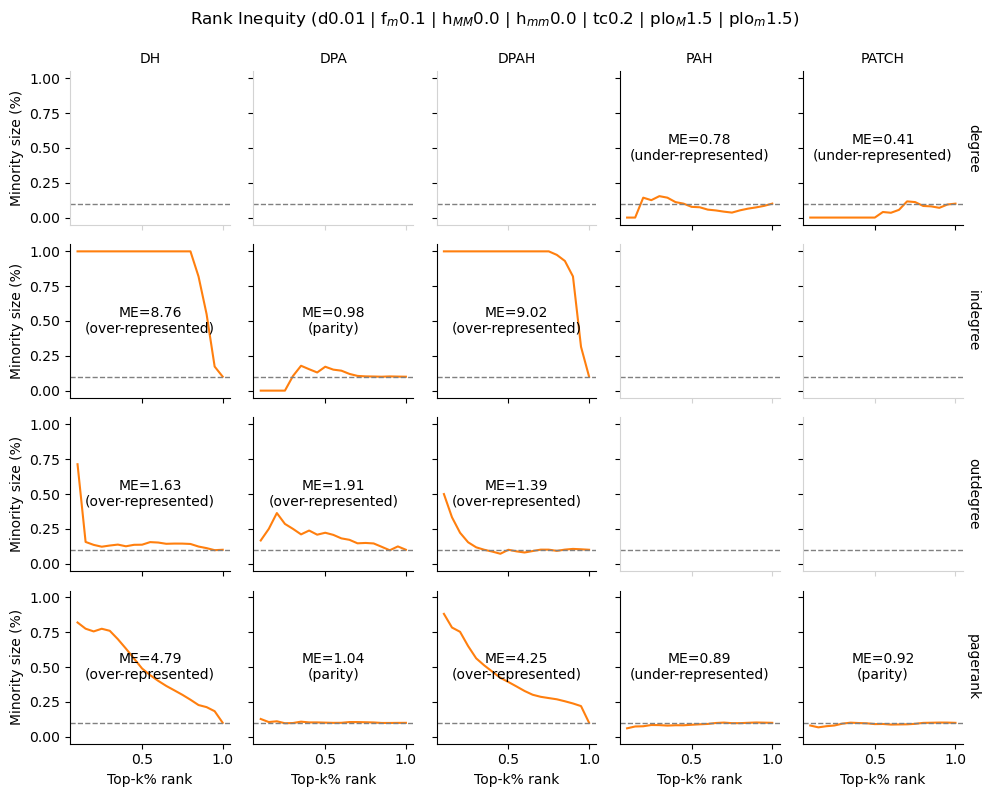

In [9]:
viz.plot_inequity_across_models(data, output=PLOTS, **params)